<a href="https://colab.research.google.com/github/kushshah777/MachineLearningAssignment2/blob/master/BestModelwithCifar10dataandnovalidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 27s 541us/step - loss: 1.8331 - acc: 0.3313 - val_loss: 1.6295 - val_acc: 0.4116
Epoch 2/100
50000/50000 [==============================] - 27s 543us/step - loss: 1.4949 - acc: 0.4616 - val_loss: 1.4027 - val_acc: 0.4916
Epoch 3/100
50000/50000 [==============================] - 26s 529us/step - loss: 1.3565 - acc: 0.5134 - val_loss: 1.3058 - val_acc: 0.5291
Epoch 4/100
50000/50000 [==============================] - 19s 383us/step - loss: 1.2563 - acc: 0.5512 - val_loss: 1.1605 - val_acc: 0.5887
Epoch 5/100
50000/50000 [==============================] - 19s 378us/step - loss: 1.1783 - acc: 0.5816 - val_loss: 1.0737 - val_acc: 0.6250
Epoch 6/100
50000/50000 [==============================] - 19s 381us/step - loss: 1.1064 - acc: 0.6082 - val_loss: 1.0187 - val_acc: 0.6455
Epoch 7/100
50000/50000 [==============================] - 19s 383us/step - loss: 1.0486 - acc: 0.6301 - val_l

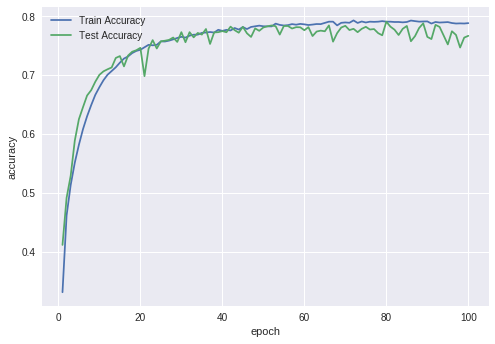

validation loss: 0.7297152853012085
validation accuracy: 0.7667


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_train)
modelhistory = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(modelhistory.history)
plotaccuracy = plt.plot(range(1,epochs+1),modelhistory.history['acc'],range(1,epochs+1),modelhistory.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)


print('validation loss:',modelhistory.history['val_loss'][-1])
print('validation accuracy:',modelhistory.history['val_acc'][-1])
